In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy.linalg as LA
%matplotlib inline

### Define global variables

In [2]:
rho = 0.85
mu = 11.4
sigma = 0.7

#### Part (a) Graph the 100st oberservations

In [3]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)

eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma) #Vector of the error term (normal)

In [4]:
#simulation model
def process(z, ind):
    return rho*z +(1-rho)*mu + eps_vec[ind]
def sim1():
    Z = np.empty(T+1) # 500 observations excluding the first
    Z[0] = mu
    for i in range(T):
        Z[i+1] = process(Z[i], i)
    return Z

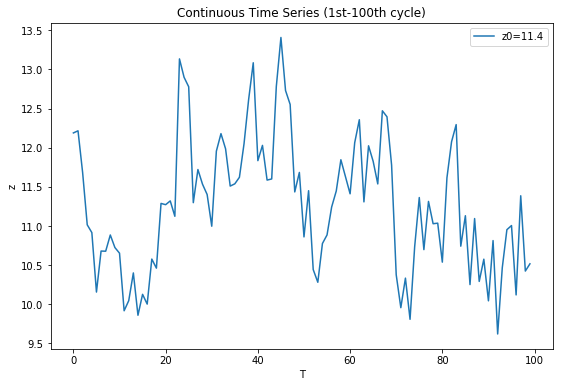

In [5]:
Z = sim1()
plt.figure(figsize=(9,6))
plt.plot(Z[1:101], label='z0={}'.format(mu))
plt.legend(loc='best')
plt.xlabel('T')
plt.ylabel('z')
plt.title('Continuous Time Series (1st-100th cycle)')

#### Part (b) Five-element vector

In [6]:
z_vals = np.linspace(mu-3*sigma, mu+3*sigma, 5)
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

#### Part (c) Markov Transition Matrix

In [7]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

In [8]:
# Group function
def classify(x):
    return np.count_nonzero(x > z_cuts)

In [9]:
markov_trans = np.full((5,5), 0)
for i in range(T):
    #Row: Start Status
    #Column: End Status
    markov_trans[classify(Z[i])][classify(Z[i+1])] += 1
markov_mle = (markov_trans.T/markov_trans.sum(axis=1)).T
markov_mle2 = pd.DataFrame(markov_mle)
markov_mle2.columns=[1,2,3,4,5]
markov_mle2.index=[1,2,3,4,5]
print('The estimated transition matrix is\n', markov_mle2)
print('Note:\nRow number is the start status,\nColumn number is the end status.')

The estimated transition matrix is
           1         2         3         4         5
1  0.693878  0.265306  0.040816  0.000000  0.000000
2  0.091667  0.550000  0.325000  0.033333  0.000000
3  0.030488  0.219512  0.481707  0.231707  0.036585
4  0.000000  0.042017  0.344538  0.504202  0.109244
5  0.000000  0.000000  0.041667  0.354167  0.604167
Note:
Row number is the start status,
Column number is the end status.


#### Part (d) Markov estimate

In [10]:
transformation = LA.matrix_power(markov_mle.T, 3) @ np.array([0, 0, 1, 0, 0]).T
print('The probability of going from z_t(3) to z_t+3(5) is {}'.format(transformation[4]))

The probability of going from z_t(3) to z_t+3(5) is 0.08058689966619678


#### Part (e) Stationary distribution

In [11]:
now = np.array([0, 0, 1, 0, 0]).T
tolerance = 1e-10
diff = 1

while diff > tolerance:
    now_next = markov_mle.T @ now 
    diff = LA.norm(now_next - now)
    now = now_next
print('The long-run stationary distribution is:\n', now)

The long-run stationary distribution is:
 [0.1045698  0.24154031 0.32373493 0.23529555 0.09485941]


#### Part (f) Compare the two simulations

In [12]:
Z_markov = np.zeros(T+1, dtype=int)
Z_markov[0] = 2

In [13]:
for i in range(T):
    Z_markov[i+1] = np.argwhere(unif_vec[i] <= np.cumsum(markov_mle[Z_markov[i], :])).min()
Z_markov_v = np.zeros(T+1, dtype=float)
for i in range(T+1):
    Z_markov_v[i] = z_vals[Z_markov[i]]

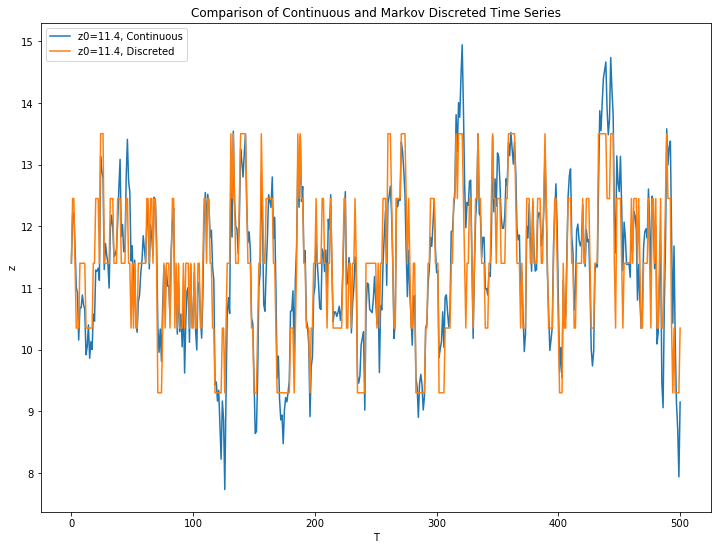

In [14]:
plt.figure(figsize=(12,9))
plt.plot(Z, label='z0={}, Continuous'.format(mu))
plt.plot(Z_markov_v, label='z0={}, Discreted'.format(z_vals[2]))
plt.legend(loc='best')
plt.xlabel('T')
plt.ylabel('z')
plt.title('Comparison of Continuous and Markov Discreted Time Series')